## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

Clean date

In [2]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns
import os


In [3]:
# Import the data from 

X_train = pd.read_csv('../data/preprocessed/X_train.csv')
X_test = pd.read_csv('../data/preprocessed/X_test.csv')
y_train = pd.read_csv('../data/preprocessed/y_train.csv')
y_train = y_train.values.ravel() # Change pd df to 1d numpy array
y_test = pd.read_csv('../data/preprocessed/y_test.csv')
y_test = y_test.values.ravel() # Change pd df to 1d numpy array

### LinearRegression

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
X_train = pd.read_csv('../data/preprocessed/X_train.csv')
X_test = pd.read_csv('../data/preprocessed/X_test.csv')
y_train = pd.read_csv('../data/preprocessed/y_train.csv').values.ravel()  # Convert to 1D array
y_test = pd.read_csv('../data/preprocessed/y_test.csv').values.ravel()    # Convert to 1D array

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Training MSE: 20398053945.676823
Test MSE: 185789898507.21268
Training R^2: 0.6678487040597337
Test R^2: 0.2962982947897199


Significant discrepancy between your training and test results. The much lower MSE and higher R² on the training set compared to the test set suggest that your model may be overfitting to the training data

### Ridge Regression

In [5]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model with alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge Training MSE: {train_mse_ridge}")
print(f"Ridge Test MSE: {test_mse_ridge}")
print(f"Ridge Training R^2: {train_r2_ridge}")
print(f"Ridge Test R^2: {test_r2_ridge}")

Ridge Training MSE: 20398059059.341606
Ridge Test MSE: 185783076353.47266
Ridge Training R^2: 0.6678486207914773
Ridge Test R^2: 0.29632413452190465


Ridge Regression show a similar pattern as before, with close values between training and test sets compared to your initial model, the test MSE and R² have improved slightly

### Lasso Regression

In [6]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with alpha (regularization strength)
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Training MSE: {train_mse_lasso}")
print(f"Lasso Test MSE: {test_mse_lasso}")
print(f"Lasso Training R^2: {train_r2_lasso}")
print(f"Lasso Test R^2: {test_r2_lasso}")

Lasso Training MSE: 20398054631.266705
Lasso Test MSE: 185790002907.43234
Lasso Training R^2: 0.6678486928959448
Lasso Test R^2: 0.2962978993612644


Lasso regression results are quite similar to the Ridge regression results, with minimal change in the training and test MSE and R²

## Hyperparam Tuning

### Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Cross-Validation MSE: {cv_mse}")

Cross-Validation MSE: 20879719637.5632


Cross-validation MSE of approximately 20.88 billion indicates a more generalized performance estimate across different subsets of your data. This value is higher than your training MSE but more realistic.

### Ridge Regression - GridSearchCV

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  # Different solvers
}

# Initialize the Ridge model
ridge_model = Ridge()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for Ridge: {best_params}")
print(f"Best cross-validation score (negative MSE): {best_score}")

# Evaluate the best model on the test set
best_ridge_model = grid_search.best_estimator_
y_test_pred_ridge = best_ridge_model.predict(X_test)

test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Test MSE (Ridge): {test_mse_ridge}")
print(f"Test R^2 (Ridge): {test_r2_ridge}")

Best parameters for Ridge: {'alpha': 100, 'solver': 'lsqr'}
Best cross-validation score (negative MSE): -20868998146.158848
Test MSE (Ridge): 185213017532.04303
Test R^2 (Ridge): 0.2984833012362059


GridSearchCV to find the optimal parameters for Ridge regression, with alpha=100 and solver='lsqr'. cross-validation score and test performance indicate a slight improvement in the Test MSE and R², but the overall performance

### Lasso Regression - GridSearchCV

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.1, 0.5, 1.0, 5, 10, 100],  # Regularization strength
    'max_iter': [1000, 5000, 10000],        # Maximum number of iterations
}

# Initialize the Lasso model
lasso_model = Lasso()

# Initialize GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso,
                                 cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and score
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print(f"Best parameters for Lasso: {best_params_lasso}")
print(f"Best cross-validation score (negative MSE): {best_score_lasso}")

# Evaluate the best Lasso model on the test set
best_lasso_model = grid_search_lasso.best_estimator_
y_test_pred_lasso = best_lasso_model.predict(X_test)

test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Test MSE (Lasso): {test_mse_lasso}")
print(f"Test R^2 (Lasso): {test_r2_lasso}")

Best parameters for Lasso: {'alpha': 100, 'max_iter': 1000}
Best cross-validation score (negative MSE): -20870218646.206604
Test MSE (Lasso): 185799142716.19284
Test R^2 (Lasso): 0.29626328123045254


Both Ridge and Lasso, even after tuning, show similar performance. This suggests that the linear models, even with regularization, may not be showing the complexity of your data well.

### Polynomial Features

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline for polynomial features with Ridge or Lasso
degree = 2  # You can try different degrees
poly_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=100))

# Fit and evaluate the model
poly_ridge.fit(X_train, y_train)
y_test_pred_poly_ridge = poly_ridge.predict(X_test)

test_mse_poly_ridge = mean_squared_error(y_test, y_test_pred_poly_ridge)
test_r2_poly_ridge = r2_score(y_test, y_test_pred_poly_ridge)

print(f"Polynomial Ridge Test MSE: {test_mse_poly_ridge}")
print(f"Polynomial Ridge Test R^2: {test_r2_poly_ridge}")

Polynomial Ridge Test MSE: 141118997708.28897
Polynomial Ridge Test R^2: 0.46549473290641075


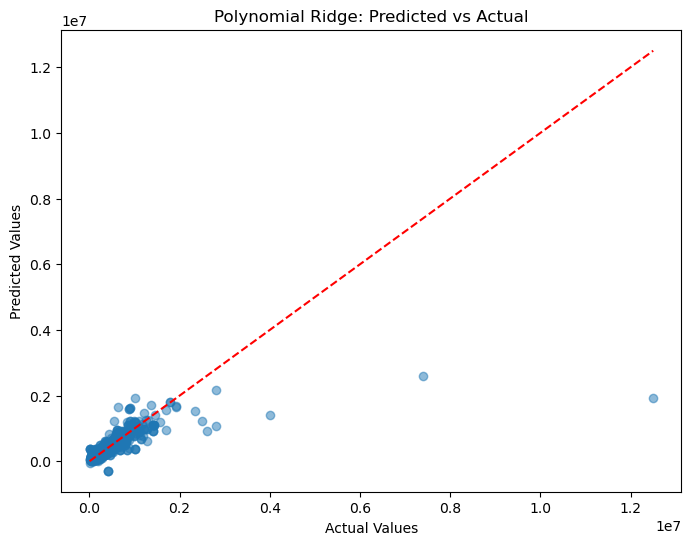

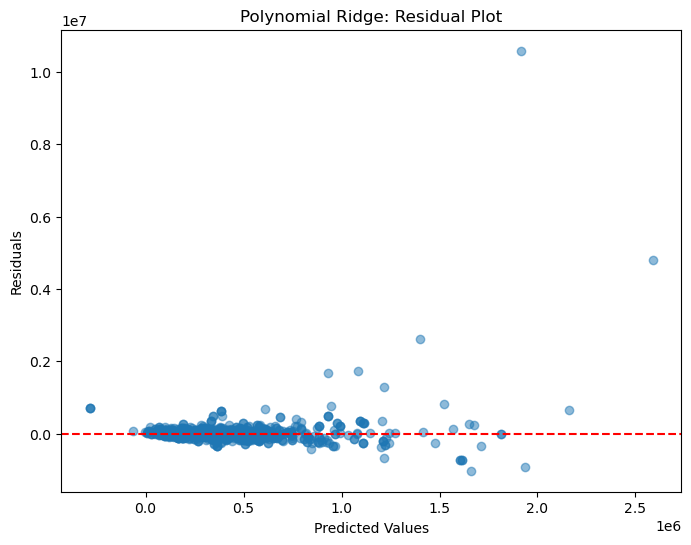

In [11]:
import matplotlib.pyplot as plt

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_poly_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Ridge: Predicted vs Actual')
plt.show()

# Plot 2: Residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred_poly_ridge
plt.scatter(y_test_pred_poly_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Polynomial Ridge: Residual Plot')
plt.show()

Polynomial Features combined with Ridge Regression show a significant improvement compared to the previous models:

Test MSE: 141.1 billion, which is notably lower than the results from the original Ridge and Lasso models.
Test R²: 0.465, which is a substantial improvement, indicating that the polynomial features helped the model better capture the relationship between the predictors and the target variable.

Polynomial Features on JSON File

In [20]:
import json

# Results
results = {
    "Polynomial Ridge Test MSE": test_mse_poly_ridge,
    "Polynomial Ridge Test R^2": test_r2_poly_ridge
}

# Save to a JSON file
with open('polynomial_ridge_results.json', 'w') as json_file:
    json.dump(results, json_file)

print("Results saved to 'polynomial_ridge_results.json'.")

Results saved to 'polynomial_ridge_results.json'.


## Random Forest 

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Test MSE: {test_mse_rf}")
print(f"Random Forest Test R^2: {test_r2_rf}")

Random Forest Test MSE: 150821779317.79333
Random Forest Test R^2: 0.42874427435752405


Random Forest model's performance is somewhat close to the Polynomial features results, but it didn't outperform the polynomial model in this case

## Hyperparam Tuning

### RandomForestRegressor - GridSearchCV

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation score (negative MSE): {best_score_rf}")

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)

test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Test MSE (Random Forest): {test_mse_rf}")
print(f"Test R^2 (Random Forest): {test_r2_rf}")


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (negative MSE): -1977244096.4612327
Test MSE (Random Forest): 150652485241.3763
Test R^2 (Random Forest): 0.4293854961419906


Tuned Random Forest model has improved in terms of cross-validation score, but the Test MSE and R² are still not outperforming the Polynomial Ridge model. This suggests that Random Forest, while robust, may not be capturing certain relationships in the data as effectively as polynomial features

### Feature Importance

In [14]:
# Get feature importances from the RandomForest model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                         Feature    Importance
33                                  city_encoded  3.487228e-01
1                               description_sqft  3.307382e-01
6                        description_total_baths  5.866685e-02
5                  description_year_built_decade  4.043424e-02
0                           description_lot_sqft  3.692373e-02
2                             description_garage  2.170240e-02
24                                     fireplace  1.782488e-02
9                        description_type_condos  1.627777e-02
4                               description_beds  1.453984e-02
3                            description_stories  1.288026e-02
31                                          view  1.134023e-02
22                                    dishwasher  9.586357e-03
20                   community_security_features  8.840347e-03
12                       description_type_mobile  7.121953e-03
26                               hardwood_floors  6.737

## Xgboost

In [15]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize base models
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize the meta-model
meta_model = LinearRegression()

# Initialize the stacking regressor
stacking_regressor = StackingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)], 
                                       final_estimator=meta_model)

# Fit the stacking regressor on the training data
stacking_regressor.fit(X_train, y_train)

# Predict on the test set
y_test_pred_stacking = stacking_regressor.predict(X_test)

# Evaluate the stacking model
test_mse_stacking = mean_squared_error(y_test, y_test_pred_stacking)
test_r2_stacking = r2_score(y_test, y_test_pred_stacking)

print(f"Stacking Regressor with XGBoost Test MSE: {test_mse_stacking}")
print(f"Stacking Regressor with XGBoost Test R^2: {test_r2_stacking}")

Stacking Regressor with XGBoost Test MSE: 150413526569.69757
Stacking Regressor with XGBoost Test R^2: 0.4302905810044414


XGBoost is performing similarly to the Random Forest, with a slight improvement in the Test MSE and R²

## Hyperparam Tuning

### XGBRegressor - GridSearchCV

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best cross-validation score (negative MSE): {best_score_xgb}")

# Evaluate the best XGBoost model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_test_pred_xgb = best_xgb_model.predict(X_test)

test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"Test MSE (XGBoost): {test_mse_xgb}")
print(f"Test R^2 (XGBoost): {test_r2_xgb}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation score (negative MSE): -1112311077.9447157
Test MSE (XGBoost): 156853017253.29184
Test R^2 (XGBoost): 0.40590023141525156


The Polynomial Ridge model is still outperforming XGBoost in terms of both MSE and R².
The Stacking Regressor with XGBoost slightly outperforms the standalone XGBoost, indicating that combining models in an ensemble is more beneficial than using XGBoost alone.

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [19]:
import pandas as pd

# Define metrics for each model
metrics = {
    'Model': ['Linear Regression', 'Random Forest ', 'XGBoost'],
    'Mean Squared Error': [20398053945.676823, 150652485241.3763, 156853017253.29184],
    'R^2 Score': [0.6678487040597337, 0.4293854961419906, 0.40590023141525156],  # R^2 for all models
    'Mean Absolute Error': [None, None, None],  # Placeholder if no MAE provided for any model
    'Cross-Validated MSE': [None, -1977244096.4612327, -1112311077.9447157]  # Cross-Validated MSE
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

               Model  Mean Squared Error  R^2 Score Mean Absolute Error  \
0  Linear Regression        2.039805e+10   0.667849                None   
1     Random Forest         1.506525e+11   0.429385                None   
2            XGBoost        1.568530e+11   0.405900                None   

   Cross-Validated MSE  
0                  NaN  
1        -1.977244e+09  
2        -1.112311e+09  


Summary:
Polynomial Features  show a significant improvement compared to the previous models:

Test MSE: 141.1 billion, which is notably lower than the results from the original Ridge and Lasso models.
Test R²: 0.465, which is a substantial improvement, indicating that the polynomial features helped the model better capture the relationship between the predictors and the target variable.

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [18]:
# We incorporate various models (Linear Regression (Lasso), Random Forest, XGBoost) with the aim of optimizing performance to achieve the best results.